In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': int(1024*1.2),
        'height': 768,
        'scroll':True
})

In [91]:
# load dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import json
import pickle

# Agenda

## Focus of today
* Recap of the essentials of web scraping.
    * Navigating html, reliable connection, parsing, storing, logging.

* Showing you some tricks of the trade
* Hands on with APIs

... 
* Pointing to the skills you need to master.

## Motivation
<a href="https://imgflip.com/i/24m2p1"><img src="https://i.imgflip.com/24m2p1.jpg" title="made at imgflip.com"/></a>


## Main take-away
* Central problem you are facing is *ensuring* and *demonstrating* **data quality** by:
    * Logging, 
        * the scraping process
        * the parse
    * ensuring reproducibility (storing raw data)        
    * inspections (random selections of your parse)
    * exploratory data analysis.



# Quick setup - connecting and legal notice

## Ethics / Legal Issues
* If a regular user can’t access it, we shouldn’t try to get it (That is considered hacking)https://www.dr.dk/nyheder/penge/gjorde-opmaerksom-paa-cpr-hul-nu-bliver-han-politianmeldt-hacking. 
* Don't hit it to fast: Essentially a DENIAL OF SERVICE attack (DOS). [Again considered hacking](https://www.dr.dk/nyheder/indland/folketingets-hjemmeside-ramt-af-hacker-angreb). 
* Add headers stating your name and email with your requests to ensure transparency. 
* Be careful with copyrighted material.
* Fair use (don't take everything)
* If monetizing on the data, be careful not to be in direct competition with whom you are taking the data from.
* Who are you collecting data about?
    * Political groups, minorities or organizations, or all at the same time?
     

## Connecting

In [2]:
# Transparent scraping
import requests
#response = requests.get('https://www.google.com')
session = requests.session()
session.headers['email'] = 'youremail' 
session.headers['name'] = 'name'
session.headers

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'email': 'youremail', 'name': 'name'}

A quick tip is that you can change the user agent to a cellphone to obtain more simple formatting of the html. 

In [172]:
# Control the pace of your calls
import time
def ratelimit():
    "A function that handles the rate of your calls."
    time.sleep(1) # change to design more clever schemes for handling the rate of calls.
# Reliable requests
def request(url,iterations=10,exceptions=(Exception)):
    """This module ensures that your script does not crash from connection errors.
        iterations : Define number of iterations before giving up. 
        exceptions: Define which exceptions you accept, default is all. 
    """
    for iteration in range(iterations):
        try:
            # add ratelimit function call here
            ratelimit() # !!
            response = session.get(url)
            return response # if succesful it will end the iterations here
        except exceptions as e: #  find exceptions in the request library requests.exceptions
            print(e) # print or log the exception message.
    return None # your code will purposely crash if you don't create a check function later.

In [173]:
# Interactive browsing. 
# Need to download geckodrivers (https://github.com/mozilla/geckodriver/releases) and install selenium first
from selenium import webdriver
path2gecko = '/Users/axelengbergpallesen/Downloads/geckodriver' # define path to your geckodriver
browser = webdriver.Firefox(executable_path=path2gecko)
browser.get('https://www.facebook.com')

# Essentials of webscraping

## Essentials (1): Reading html
* Using the Inspector
    * locating paths to elements: e.g css selectors
    * structure of the html-tree
    * uncover hidden information e.g. extra meta data.
    * Find direct links to the underlying database. Visit (https://www.jobnet.dk)

In [174]:
url = 'https://job.jobnet.dk/CV/FindWork?SearchString=it&Offset=0&SortValue=BestMatch'
response = request(url)

## Essentials(2): Navigation
- http hacking: Visit https://www.jobindex.dk
- crawling and following links
- interactions 
    * send keys: e.g. login 
    * clicks
    * scroll-down (https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python)

In [175]:
# hardcoded interaction
css_sel = 'html#facebook.tinyViewport.tinyWidth.tinyHeight body.fbIndex.UIPage_LoggedOut.hasBanner._-kb.sf._61s0.b_c3pyn-ahh.gecko.mac.x1.Locale_da_DK.cores-lt4.hasCookieBanner.hasAXNavMenubar._19_u div#u_0_d._li div#pagelet_bluebar div#blueBarDOMInspector div._53jh div.loggedout_menubar_container div.clearfix.loggedout_menubar div.menu_login_container.rfloat._ohf form#login_form table tbody tr td input#email.inputtext'
element = browser.find_element_by_css_selector(css_sel)
username = 'hello'
element.send_keys(username)

## Essentials(3): Parsing


In [177]:
import re # generic pattern search
from bs4 import BeautifulSoup # navigating the html tree
'Scraping,2,is,3,easy,6,?'.split(',')[::2] # good old split function

['Scraping', 'is', 'easy', '?']

![](http://www.tankonyvtar.hu/hu/tartalom/tamop412A/2011_0015_kliens_oldali_technologiak_EN/files/4018.jpg)


In [179]:
url = 'https://it.jobindex.dk/jobsoegning?maxdate=20180214&mindate=20171101&jobage=archive'
response = request(url)
soup = BeautifulSoup(response.text,'lxml')

In [181]:
# lets find the section with the results.
results = soup.findAll('div',{'class':'results  component--default'})
results


[]

** shit! ** it is dynamically generated. 

Now we have the possibility of using selenium or inpecting the network acitivty / following the html build instructions.

In [182]:
url = 'https://it.jobindex.dk/jobsoegning.json?q=&jobage=archive&mindate=20171101&maxdate=20180214&page=0'
response = request(url)
if response.ok:
    
    print('response is OK')
    soup = BeautifulSoup(response.json()['result_list_box_html'],'lxml')
    

response is OK


In [184]:
results = soup.find('div',{'class':'results component--default'})
for child in results.findAll('div'):
    break
    # getting links.
    relative_link = child.a['data-click']

    # getting headlines.
    headline = child.b.text
    # company
    company = child.p.a.b.text

## Essentials(4): Storing, and formatting

In [ ]:
f = open(filename,'w')
#formats
#raw,pickle,json, csv
f.write()
json.dump(), json.dumps
csv.writer
pd.to_csv,pd.to_pickle,pd.to_feather 
# for arbitrary python objects
pickle.dump
# Databases.

In [ ]:
! mkdir jobindex_raw

In [197]:
# paging the first 5
for page_n in range(5):
    url = 'https://it.jobindex.dk/jobsoegning.json?q=&jobage=archive&mindate=20171101&maxdate=20180214&page=%d'%page_n
    response = request(url)
    # store it.
    break
    if response.ok:
        path = 'jobindex_raw/jobindex_page_%d'%page_n
        f = open(path,'w')
        f.write(response.text)
        f.close()
    

In [193]:
data = json.loads(response.text)

## Essentials (5): Logging and Quality Controls

In [5]:
response = request('https://www.google.com')

In [ ]:
# setting up the logfile
! mkdir logs
log_id = 0 
logfile = open('logs/test_log','w') 
log_header = ['log_id','status_code','timestamp','length','output_file']  # 
logfile.write(','.join(log_header)) # comment this out after the first write
logfile.close() 


In [29]:
logfile = open('logs/test_log','a') 
import time
def log(response,output_path,logfile=logfile):
    "A simple example of a logging function"
    global log_id
    # give it an id
    log_id += 1
    status_code = response.status_code
    timestamp = time.time()
    length = len(response.text)
    # Header 'log_id','status_code','timestamp','length','output_file'
    logfile.write('%d,%d,%r,%d,%s'%(log_id,status_code,timestamp,length,output_path))
    # add a write function here
    
! mkdir test_scrape
log(response,'test_scrape/google.com')

13236

## Quality of the parse
* Number of missing values accross different Variables, and accross different sites or subsections of a site.
* If temporal data: quality accross time.
* Profile missing values
    * Might be related to time of day, rate of calls, length of the response, or other more complex factors logged.
* Do many random samples of the parse and checks of the final dataframe or dataset.
    * E.g. do random sample in pandas like this: df.sample(frac=0.1).head()



# Scraping the Cryptomarkets to investigate rate of success, bots and scams.

## Exercise (1)
Visit following page: https://coinmarketcap.com/

The page allows you to investigate the ***"big"*** players of the cryptomarket. 

** Navigation **
- Find a way to navigate the page and extract links to the blockchain companies.



## Solutions (1)
- First visit following page: https://coinmarketcap.com/
- Look in the network: find the quick-search jsonfile.


In [201]:
# this is a site note, just wanted to show you how to parse a table from html using pandas.
response = request('https://coinmarketcap.com/')
coin_df = pd.read_html(response.text,attrs={'id':'currencies'}) # using pandas to parse the table.

In [209]:
coin_df[0].head()

,#,Name,Market Cap,Price,Volume (24h),Circulating Supply,Change (24h),Price Graph (7d)
0,1,BTC Bitcoin,"$164,813,477,318",$9771.77,"$8,477,880,000","16,866,287 BTC",6.00%,NaN
1,2,ETH Ethereum,"$90,729,788,972",$929.32,"$2,958,370,000","97,630,298 ETH",4.12%,NaN
2,3,XRP Ripple,"$43,932,178,877",$1.13,"$1,590,210,000","39,009,215,838 XRP *",5.29%,NaN
3,4,BCH Bitcoin Cash,"$22,866,525,417",$1347.55,"$651,822,000","16,968,963 BCH",3.39%,NaN
4,5,LTC Litecoin,"$12,496,631,350",$226.28,"$2,504,410,000","55,227,383 LTC",10.58%,NaN


In [198]:
url = 'https://files.coinmarketcap.com/generated/search/quick_search.json'
coins = request(url).json()

In [62]:
coins

[{'name': 'Bitcoin',
  'rank': 1,
  'slug': 'bitcoin',
  'symbol': 'BTC',
  'tokens': ['Bitcoin', 'BTC']},
 {'name': 'Ethereum',
  'rank': 2,
  'slug': 'ethereum',
  'symbol': 'ETH',
  'tokens': ['Ethereum', 'ETH']},
 {'name': 'Ripple',
  'rank': 3,
  'slug': 'ripple',
  'symbol': 'XRP',
  'tokens': ['Ripple', 'XRP']},
 {'name': 'Bitcoin Cash',
  'rank': 4,
  'slug': 'bitcoin-cash',
  'symbol': 'BCH',
  'tokens': ['Bitcoin Cash', 'BCH']},
 {'name': 'Litecoin',
  'rank': 5,
  'slug': 'litecoin',
  'symbol': 'LTC',
  'tokens': ['Litecoin', 'LTC']},
 {'name': 'Cardano',
  'rank': 6,
  'slug': 'cardano',
  'symbol': 'ADA',
  'tokens': ['Cardano', 'ADA']},
 {'name': 'Stellar',
  'rank': 7,
  'slug': 'stellar',
  'symbol': 'XLM',
  'tokens': ['Stellar', 'XLM']},
 {'name': 'NEO',
  'rank': 8,
  'slug': 'neo',
  'symbol': 'NEO',
  'tokens': ['NEO', 'NEO']},
 {'name': 'EOS',
  'rank': 9,
  'slug': 'eos',
  'symbol': 'EOS',
  'tokens': ['EOS', 'EOS']},
 {'name': 'IOTA',
  'rank': 10,
  'slug': '

## Exercise (2)
Now visit one of the links and see what data you can get.

**Backdoors**
- Look at the network monitor and locate the link to the file with the historical trading data (i.e. the graph displayed). 
- See how the link is constructed, and make a loop that collects and stores the first 5 companies. 


## Solution (2)
- visit the following: https://coinmarketcap.com/currencies/singularitynet/
- What data can you get?
- Inspect the network monitor and find the data behind the generated graph.


In [ ]:
! mkdir crypto_data

In [65]:
import json
import tqdm
for coin in tqdm.tqdm(coins[0:5]):
    slug = coin['slug']

    graph_link = 'https://graphs2.coinmarketcap.com/currencies/%s/'%slug
#        response = request(graph_link)
    graph_data = request(graph_link).json()
    filename = 'crypto_data/trading_data_%s'%slug
    f = open(filename,'w')
    json.dump(graph_data,f)
    

mkdir: crypto_data: File exists


100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


In [216]:
import random
from os import listdir
path = 'crypto_data/'
files = [path+i for i in listdir(path)]
random_file = random.choice(files)
graph_data = json.load(open(random_file,'r'))
x,y = zip(*graph_data['volume_usd'])

In [214]:
#graph_data['volume_usd']

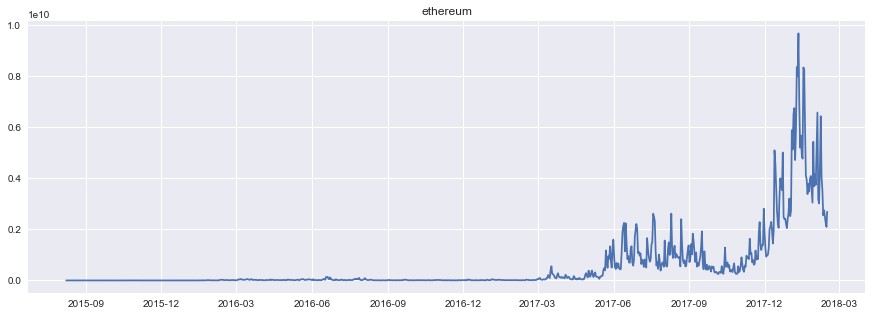

In [217]:
import datetime
plt.figure(figsize=(15,5))
plt.plot([datetime.datetime.fromtimestamp(i/1000) for i in x],y)
plt.title(random_file.split('_')[-1])
#sns.tsplot(pd.DataFrame({'t':[datetime.datetime.fromtimestamp(i/1000) for i in x],'y':y}),time='t',unit='y')

## Exercise (3)
** HTML parsing **

Now we need to visit the pages and collect data stored in the html.

Use the links collected before and store the first 5 raw html responses

* Design a parser that collects the Twitter handle of each company - from the Social Media Feed option (+whatever meta data you like) - and apply it to the raw html.
    - Note not all companies has a twitter handle.


## Solution (3)

In [77]:
# get raw_html
! mkdir crypto_data/coinmarket_html

In [78]:
from os import listdir
path = 'crypto_data/coinmarket_html/'
already_collected = listdir(path)
# add already seen

for coin in tqdm.tqdm(coins[0:5]):
    slug = coin['slug']
    if slug in already_collected:
        continue
    url = 'https://coinmarketcap.com/currencies/%s/'%slug
    response = request(url)#social')
    if response.ok:
        dumpfile = open('crypto_data/coinmarket_html/%s'%slug,'w')
        dumpfile.write(response.text)
        dumpfile.close()
        

100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


In [143]:
path = 'crypto_data/coinmarket_html/'
files = [path+filename for filename in listdir(path)]
for filename in files:
    html = open(filename,'r').read()
    soup = soup = BeautifulSoup(html,'lxml')
    # function to parse html here

In [157]:
soup # inspect the soup


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4BV1dWDxABVFdQAQIEX1M="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0

In [135]:
headers = soup.findAll('h2')
headers

[<h2><a class="navbar-brand" href="/">CoinMarketCap</a></h2>,
 <h2 class="pull-left">Ripple Markets</h2>,
 <h2 class="pull-left">Ripple Social Media Feeds</h2>,
 <h2 class="pull-left">Tools for Ripple</h2>]

In [159]:
social_media = headers[-2]

In [129]:
twitter_link = social_media.find_next('a',{'class':'twitter-timeline'})['href']
twitter_link

'https://twitter.com/Ripple'

In [131]:
twitter_name = twitter_link.strip('/').split('/')[-1]
twitter_name

'Ripple'

In [169]:
def get_twitter_handle(soup):
    # find section headers
    headers = soup.findAll('h2')
    social_media = headers[-2]
    try: 
        twitter_link = social_media.find_next('a',{'class':'twitter-timeline'})['href']
    except:
        print('no twitter_link')
       # print(social_media.find_next('div',{'class':'row'}))
        return ''
        
    twitter_name = twitter_link.strip('/').split('/')[-1]
    return twitter_name
for filename in files:
    html = open(filename,'r').read()
    soup = soup = BeautifulSoup(html,'lxml')
    # function to parse html here
    print(get_twitter_handle(soup))

no twitter_link

no twitter_link

ethereumproject
LitecoinProject
Ripple


# APIs
For fast, efficient and ***reliable*** data collection.

Only catch is that they control the amounts, and which endpoints you can collect 

also they **change**.
    - e.g. facebook cancelled 
        - querying friendship relations (without having using signing up to your app), 
        - group activity without admin rights, 
        - and most recently the ability to trace public activity (likes and comments) without admin rights.
    - twitter (and more recently facebook) will not let you collect all historic activity --> streaming data.

Begins with reading the docs... 
- getting authentification - creating apps, getting and renewing tokens - 
- building queries.
- ratelimiting and pagination.

Often comes in the Json format. --> nested dictionaries and lists.

Example: Explore the facebook api here: https://developers.facebook.com/tools/explorer/

## APIS: Collect data from Twitter

In [151]:
# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials that you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation

CONSUMER_KEY=""
CONSUMER_SECRET=""
OAUTH_TOKEN=""
OAUTH_TOKEN_SECRET=""

In [ ]:
#pickle.dump([CONSUMER_KEY,CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET],open('twitter_credentials.pkl','wb'))
CONSUMER_KEY,CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET = pickle.load(open('twitter_credentials.pkl','rb'))

In [193]:
# answer from https://stackoverflow.com/questions/33308634/how-to-perform-oauth-when-doing-twitter-scrapping-with-python-requests
from requests_oauthlib import OAuth1
#url = 'https://api.twitter.com/1.1/account/verify_credentials.json' # verify that your authorization works.
#url = 'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=singularity_net&count=5000' # get timeline

# Description of the call https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-followers-list
url = 'https://api.twitter.com/1.1/followers/list.json?cursor=-1&screen_name=%s&count=5000'%twitter_name

auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
response = requests.get(url, auth=auth).json()

In [196]:
# define container to store the responses.
responses = []

In [198]:
cursor = -1 # start with -1
url = 'https://api.twitter.com/1.1/followers/list.json?cursor=%d&screen_name=singularity_net&count=5000' %cursor
auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
response = requests.get(url, auth=auth).json()
responses.append(response)
count = 0
while cursor!=0:
    time.sleep(1)
    cursor = response['next_cursor']
    url = 'https://api.twitter.com/1.1/followers/list.json?cursor=%d&screen_name=singularity_net&count=5000'%cursor
    response = requests.get(url, auth=auth).json()
    # dump response
    responses.append(response)
    count+=1
    if count%10==0:
        print(count,end=' ')
#response

10 

KeyError: 'next_cursor'

In [199]:
response

{'errors': [{'code': 88, 'message': 'Rate limit exceeded'}]}

Packages: python-twitter and tweepy.

# Exercise(4)
- Collect the link to each of the crypto-companies' github page (Source Code) and get data from the api.
    * E.g. Get the contributors of the repository. - Count the number of unique contributors.
    * Get events. 
    * Get forks.
    

## GITHUB API
Check the docs:
https://developer.github.com/v3/

### Practice with some calls###
The github api is nice to work with because it provides links to further calls that can be made.
* This will list basic queries: https://api.github.com/
* Play around with it: e.g. https://api.github.com/repos/singnet/singnet/contributors 

### Read about paging
here: https://developer.github.com/v3/guides/traversing-with-pagination/
### Rate limits
For practice you can make calls without authorization. However if you need large amounts of data you need an authorization token.
This means the standard procedure: https://developer.github.com/apps/building-oauth-apps/authorization-options-for-oauth-apps/
    * Create an app here (under developers settings): https://github.com/settings/, collect client_id and client_secret for the app.
    * Let a user (yourself) Authorize your app. Using the specified procedure described https://github.com/login/oauth/authorize?client_id=(indsæt_client_id).
    * Get the code returned (look at the url in the top of the browser).
    * Use the code, client_id, client_secret to request an access_token: 'https://github.com/login/oauth/access_token?code=%s&client_id=%s&client_secret=%s'%(code,client_id,client_secret)




## ressource a guide to authentication

In [214]:
# look at the guide for making authorized calls:
# https://developer.github.com/apps/building-oauth-apps/authorization-options-for-oauth-apps/
client_id = ''#found in the settings of your newly generated test app
client_secret = '' # also found in the settings of your app
code = ''# found using the call  https://github.com/login/oauth/authorize?client_id=%s'%client_id

In [221]:
#pickle.dump([client_id,client_secret,code],open('github_credentials.pkl','wb'))
client_id,client_secret,code = pickle.load(open('github_credentials.pkl','rb'))

In [234]:
# as described in the docs https://developer.github.com/apps/building-oauth-apps/authorization-options-for-oauth-apps/
url = 'https://github.com/login/oauth/access_token?code=%s&client_id=%s&client_secret=%s'%(code,client_id,client_secret)
response = request(url)
token = response.text.split('access_token=')[0].split('&')[0]

In [92]:
#pickle.dump(token,open('gittoken','wb'))
token = pickle.load(open('gittoken','rb'))

## Solution (4)

In [79]:
# Read in the raw_html
path = 'crypto_data/coinmarket_html/'
files = [path+filename for filename in listdir(path)]
for filename in files:
    html = open(filename,'r').read()
    soup = soup = BeautifulSoup(html,'lxml')
    break

In [84]:
link = soup.find('a',text='Source Code')['href']
git_screen_name = link.strip('/').split('/')[-1]
link,git_screen_name

('https://github.com/bitcoin/', 'bitcoin')

In [93]:
url = 'https://api.github.com/users/%s?access_token=%s'%(git_screen_name,token)
response = request(url)
response.json()

{'avatar_url': 'https://avatars2.githubusercontent.com/u/528860?v=4',
 'bio': None,
 'blog': 'http://bitcoin.org/',
 'company': None,
 'created_at': '2010-12-18T21:50:48Z',
 'email': None,
 'events_url': 'https://api.github.com/users/bitcoin/events{/privacy}',
 'followers': 0,
 'followers_url': 'https://api.github.com/users/bitcoin/followers',
 'following': 0,
 'following_url': 'https://api.github.com/users/bitcoin/following{/other_user}',
 'gists_url': 'https://api.github.com/users/bitcoin/gists{/gist_id}',
 'gravatar_id': '',
 'hireable': None,
 'html_url': 'https://github.com/bitcoin',
 'id': 528860,
 'location': None,
 'login': 'bitcoin',
 'name': 'Bitcoin',
 'organizations_url': 'https://api.github.com/users/bitcoin/orgs',
 'public_gists': 0,
 'public_repos': 4,
 'received_events_url': 'https://api.github.com/users/bitcoin/received_events',
 'repos_url': 'https://api.github.com/users/bitcoin/repos',
 'site_admin': False,
 'starred_url': 'https://api.github.com/users/bitcoin/starre

In [96]:
# lets look at some contributors

url = 'https://api.github.com/repos/singnet/singnet/contributors?access_token=%s'%token
response = request(url)
response.json()

[{'avatar_url': 'https://avatars0.githubusercontent.com/u/1048706?v=4',
  'contributions': 219,
  'events_url': 'https://api.github.com/users/inflector/events{/privacy}',
  'followers_url': 'https://api.github.com/users/inflector/followers',
  'following_url': 'https://api.github.com/users/inflector/following{/other_user}',
  'gists_url': 'https://api.github.com/users/inflector/gists{/gist_id}',
  'gravatar_id': '',
  'html_url': 'https://github.com/inflector',
  'id': 1048706,
  'login': 'inflector',
  'organizations_url': 'https://api.github.com/users/inflector/orgs',
  'received_events_url': 'https://api.github.com/users/inflector/received_events',
  'repos_url': 'https://api.github.com/users/inflector/repos',
  'site_admin': False,
  'starred_url': 'https://api.github.com/users/inflector/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/inflector/subscriptions',
  'type': 'User',
  'url': 'https://api.github.com/users/inflector'},
 {'avatar_url': 'https:

In [246]:
# list of possible calls: https://api.github.com/

# check your ratelimit: 'https://api.github.com/rate_limit?access_token=%s'%token
#interesting calls
# https://api.github.com/repos/singnet/singnet/contributors # contributors to a project, create a network of co-contributors.
# 'https://api.github.com/repos/singnet/singnet/forks'
#'https://api.github.com/repos/singnet/singnet/events' # get all events (watch and fork, pull, push and commit events), are they coordinated?
## are they from bots. e.g. dmonroe3 who follows 5 blockchain things.
## Also includes push events and messages.
# 'https://api.github.com/users/dmonroe3/followers # get the followers of a user
# https://api.github.com/users/thinxtank # get basic info about a user.


### paging

In [245]:
url ='https://api.github.com/repos/singnet/singnet/forks'
response = request(url)
response.headers['Link'] # Here you can read how many pages to page. read here: https://developer.github.com/v3/guides/traversing-with-pagination/

'<https://api.github.com/repositories/100654282/forks?page=2>; rel="next", <https://api.github.com/repositories/100654282/forks?page=3>; rel="last"'

# Perspectives
## Regex
For cleaning, further extraction of information from html and text, you need to learn Regular expressions --> More to come in the future sessions. 

    - For now. Go play around at https://www.regexr.com.

or do the following exercises:
- Locate the link to the website of each of the blockchain companies. 
- Try to find the number of doctors displayed on the website of each project (frontpage or crawl the whole map, while your at it see if you can do some other stats about the team.). Match the name after the Dr. prefix.
- Find the numbers thrown around on each website: $9234 million / trillion / thousands. 
    - Find the previous word before the number.

# Perspectives (2)
## Common scenarios
Tabular data from html.
    - Beautifulsoup: Google is your friend (e.g. https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table)
    - Pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html

Interactions(clicking, scrolling, logins etc):
    * Use selenium.
        - Select element (using css-selector path or search as in beautifulsoup)
            - element.click()
            - element.send_keys()
        - scrolling (google "scroll to the bottom selenium python")

# Perspectives(3)
### Reliability
EDA